TASK 3

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print("x_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("x_train shape:", X_test.shape, "y_train shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_train shape: (10000, 28, 28) y_train shape: (10000,)


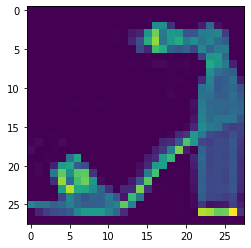

In [4]:
plt.imshow(X_train[28286])

In [5]:
X_train = X_train.reshape(X_train.shape[0],-1).T[:,: -10000]
X_test = X_test.reshape(X_test.shape[0],-1)

y_tr = np.zeros((y_train.shape[0],10))
y_tr[np.arange(y_train.size),y_train] = 1
y_val = y_tr.T[:,: -10000]
y_train = y_tr.T[:,: -10000]

y_ts = np.zeros((y_test.shape[0],10))
y_ts[np.arange(y_test.size), y_test] = 1
y_test = y_ts.T

print(X_train.shape, X_test.shape)

print(y_train.shape, y_test.shape)

y_train

(784, 50000) (10000, 784)
(10, 50000) (10, 10000)


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [6]:
print(len(y_train[0]))
print(y_train[1])

50000
[0. 0. 0. ... 0. 1. 0.]


In [7]:
print(y_train[0:10])

[[0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [9]:
import numpy as np


#activation_function = sigmoid
#activation_derivative = d_sigmoid

from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
    
    def sigmoid(self, X):
        return 1/(1+np.exp(-X))
    
    def derivsigmoid(self,X):
        return X * (1 - X)
    
    def relu(self, X):
      return max(0,X)

    def softmax(self, X):

      print(X)
      for j in range (len(X[0])):
        
        sumexp = 0
        for i in range (len(X)):
          sumexp += np.exp(X[i][j])
          
        for i in range (len(X)):
          X[i][j] = np.exp(X[i][j]) / sumexp
      return X  
def crossentropy(self, X, y):
      #closs = copy.deepcopy(X)
      loss = 0
      for j in range (len(X[0])):
        for i in range (len(X)):
          loss += np.log(X[i][j]) * y[i][j]
      return loss * (-1)
      
    def mult(self, a, b):
      return a*b

    def square(a):
      return 0.5(a**2)
    
    def __init__(self, 
                 no_of_in_nodes, no_of_out_nodes, 
                 no_of_hidden_nodes, learning_rate):
        
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural network"""
        rad = 0.5 
        X = truncated_normal(mean=1, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 0.5 
        X = truncated_normal(mean=1, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
         def train(self, input_vector, target_vector,epochs=10):
        # input_vector and target_vector can be tuple, list or ndarray
        
        input_vector = np.array(input_vector, ndmin=2)
        target_vector = np.array(target_vector, ndmin=2)
        
        vecder = np.vectorize(self.derivsigmoid)
        vecact = np.vectorize(self.sigmoid)
        vecmult = np.vectorize(self.mult)
        vecsqer = np.vectorize(self.square)
        #vecsoft = np.vectorize(self.softmax)
        print("Test , ", target_vector[:100])
        for i in range(epochs):
        
            print("IP Vec",len(input_vector)," and ", len(input_vector[0]))
            # forward pass
            output_vector1 = np.dot(self.weights_in_hidden, input_vector)
            print("OP Vec1",len(output_vector1)," and ", len(output_vector1[0]))
            
            output_vector_hidden = vecact(output_vector1)

            output_vector2 = np.dot(self.weights_hidden_out, output_vector_hidden)
            print("OP Vec2",len(output_vector2)," and ", len(output_vector2[0]))
            #print("Op last layer ",output_vector2)
            #output_vector_network = vecact(output_vector2)
            #output_vector_network = vecsoft(output_vector2)
            output_vector_network = self.softmax(output_vector2)
            #convert softmax op to label values!!!!!!!
            print(output_vector_network[0][1]," and sum =1?? ", output_vector_network[1][1])
            
            # derivative of the loss
            #loss = 
            output_errors = target_vector - output_vector_network#vecsqer(loss) #self.crossentropy(output_vector_network, target_vector)
            print("OP Errors -> ",output_errors)
             # derivative of the activation function
            derivative_output = vecder (output_vector_network)  # derivative here 
            
            tmp = output_errors * derivative_output    #vecmult(derivative_output, output_errors) 
            # multiply with the previous activation (output_vector_hidden)
            who_update = self.learning_rate * np.dot(tmp, output_vector_hidden.T)

            # calculate hidden errors:
            hidden_errors = np.dot(self.weights_hidden_out.T, output_errors * derivative_output )

            derivative_hidden = vecder(output_vector_hidden)    
            tmp = hidden_errors * derivative_hidden 
            wih_update = self.learning_rate * np.dot(tmp, input_vector.T)

            # update the weights:
            self.weights_in_hidden += wih_update
            self.weights_hidden_out += who_update


    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        vecder = np.vectorize(self.derivsigmoid)
        vecact = np.vectorize(self.sigmoid)
        #vecsoft = np.vectorize(self.softmax)

        
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.weights_in_hidden, input_vector)
        output_vector = vecact(output_vector)
        
        output_vector = np.dot(self.weights_hidden_out, output_vector)
        #output_vector = vecsoft(output_vector)
        output_vector = self.softmax(output_vector)
        
        return output_vector.T

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 42)

In [10]:
simple_network = NeuralNetwork(no_of_in_nodes=28*28, 
                               no_of_out_nodes=10, 
                               no_of_hidden_nodes=4,
                               learning_rate=0.01)
simple_network.train(X_train,y_train)

y_hat = simple_network.run(X_test)
print("The type is",type(y_hat))

# converting softmax values to labels
op = copy.deepcopy(y_hat)
def convertop(y,op):
  for i in range (len(y)):
      maxv = -1
      posi = posj = -1
      for j in range(len(y[0])):
          #print(j)
          if y[i][j]>maxv:
              maxv = y[i][j]
              posi = i
              posj = j
          op[i][j] = 0
      op[posi][posj] = 1
  return op

ycheck = convertop(y_hat,op)
#print("Acc1 = ",sum(ycheck==y_test)/len(ycheck))



print(len(y_test))

NameError: name 'NeuralNetwork' is not defined

In [11]:
print(y_hat[933])

NameError: name 'y_hat' is not defined

In [ ]:
print(ycheck[:15])

In [ ]:
newy = y_test.T
print(newy[:15])

In [ ]:
print(newy.shape)
print(len(newy))
print(ycheck.shape)

In [ ]:
count = 0
for i in range (len(newy)):
  for j in range (len(newy[0])):
    if newy[i][j] == 1 and ycheck [i][j] == 1:
      #print("yes")
      count += 1

print("Accuracy = {} %".format(count/len(newy)))